In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
kgs.debugging_mode = 1

local


In [2]:
train_data = kgs.load_all_train_data()
train_data = train_data

In [3]:
todo = dict()

model = ariel_model.Fudger(model=ariel_simple.SimpleModel())
model.model.run_in_parallel = True
todo['Simple model'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['Baseline GP'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
model.model.model_options.n_iter = 4
todo['4 iters'] = model

In [4]:
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        model.train(train_data)
        inferred_data = model.infer(train_data)
        print(k)
        kgs.score_metric(inferred_data, train_data)
        kgs.dill_save(fname(k), (inferred_data,model,kgs.git_commit_id))

4 iters


Processing in parallel:   0%|                                                                  | 0/1099 [00:00<?, ?it/s]

local
local
local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:41:54<00:00,  5.56s/it]


Opt time 279.91717076301575
4 iters
Score:          0.5980
RMS error FGS:  219.70 ppm
RMS error AIRS: 160.29 ppm


Simple model
[1.0025453206212471, 1.0058359760904139]
[-7.572254157574244e-06, 1.3826449412208017e-05]
[0.7120256815378126, 0.8026776372459603]
Score:          0.4226
RMS error FGS:  221.13 ppm
RMS error AIRS: 498.43 ppm

20
Score:          0.4681
RMS error FGS:  169.04 ppm
RMS error AIRS: 192.62 ppm

No fudge
Score:          0.4162
RMS error FGS:  221.13 ppm
RMS error AIRS: 498.43 ppm


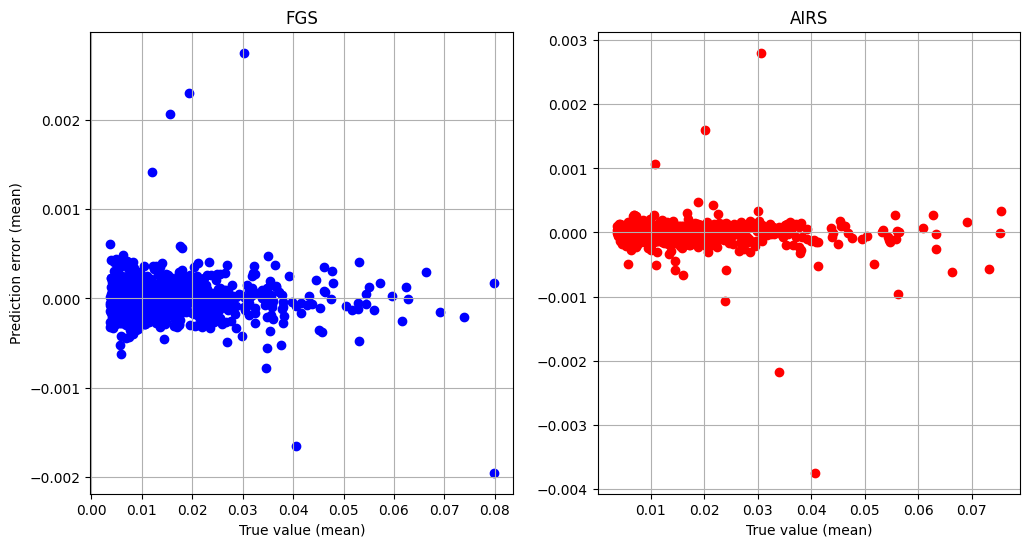

FGS
3786449677, ratio:12.493, x:3.000e-04, y:-3.748e-03, RMS:9.026e-03
3649218579, ratio:9.349, x:3.000e-04, y:2.805e-03, RMS:2.806e-03
1267010874, ratio:7.259, x:3.000e-04, y:-2.178e-03, RMS:5.660e-03
576917580, ratio:5.347, x:3.000e-04, y:1.604e-03, RMS:1.619e-03
2554492145, ratio:3.576, x:3.000e-04, y:1.073e-03, RMS:1.172e-03
AIRS
3786449677, ratio:125.879, x:2.977e-05, y:-3.748e-03, RMS:9.026e-03
3649218579, ratio:94.201, x:2.977e-05, y:2.805e-03, RMS:2.806e-03
1267010874, ratio:73.142, x:2.977e-05, y:-2.178e-03, RMS:5.660e-03
576917580, ratio:53.880, x:2.977e-05, y:1.604e-03, RMS:1.619e-03
2554492145, ratio:36.033, x:2.977e-05, y:1.073e-03, RMS:1.172e-03


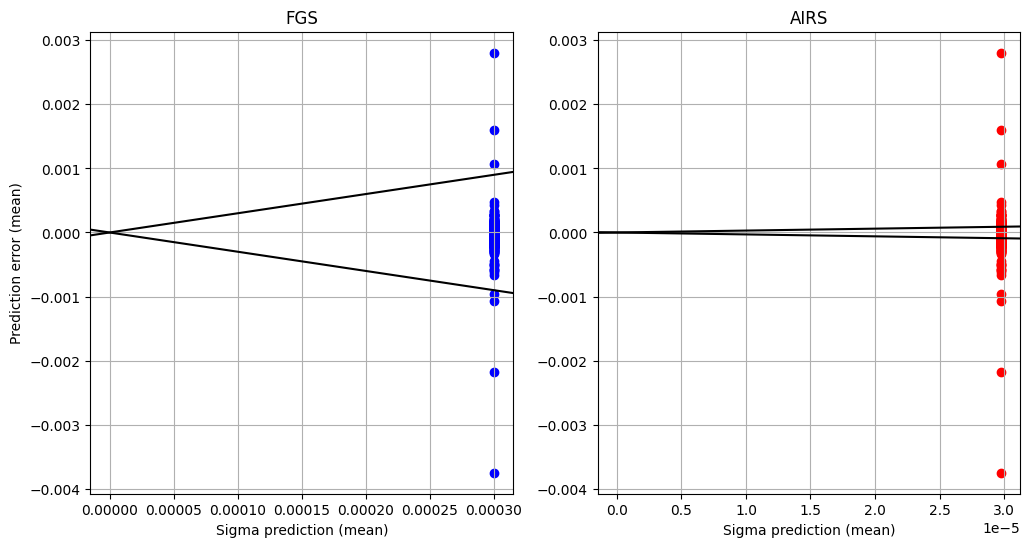

AIRS variation
3786449677, ratio:16.486, x:4.991e-04, y:8.228e-03, RMS:9.026e-03
1349926825, ratio:15.274, x:4.991e-04, y:7.624e-03, RMS:7.632e-03
1267010874, ratio:10.488, x:4.991e-04, y:5.234e-03, RMS:5.660e-03
2270815333, ratio:8.031, x:4.991e-04, y:4.008e-03, RMS:4.045e-03
2557736212, ratio:5.445, x:4.991e-04, y:2.717e-03, RMS:2.874e-03


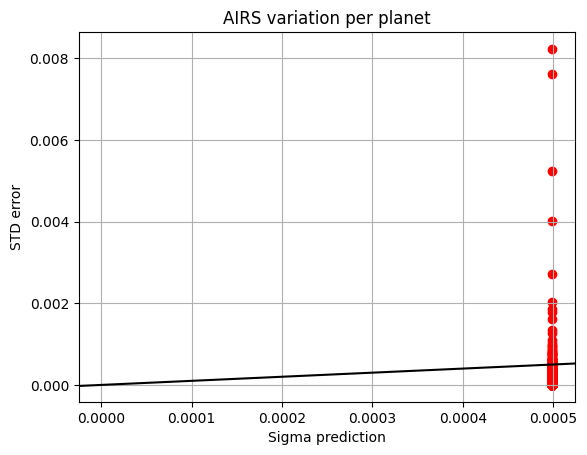

Baseline GP
[1.0024407926601804, 1.0041714257567134]
[-1.1148862130793602e-06, 1.5744604124171086e-05]
[1.6361898205631118, 1.3941572052811166]
Score:          0.5991
RMS error FGS:  217.98 ppm
RMS error AIRS: 163.23 ppm

20
Score:          0.6119
RMS error FGS:  126.31 ppm
RMS error AIRS: 79.21 ppm

No fudge
Score:          0.5772
RMS error FGS:  217.98 ppm
RMS error AIRS: 163.23 ppm


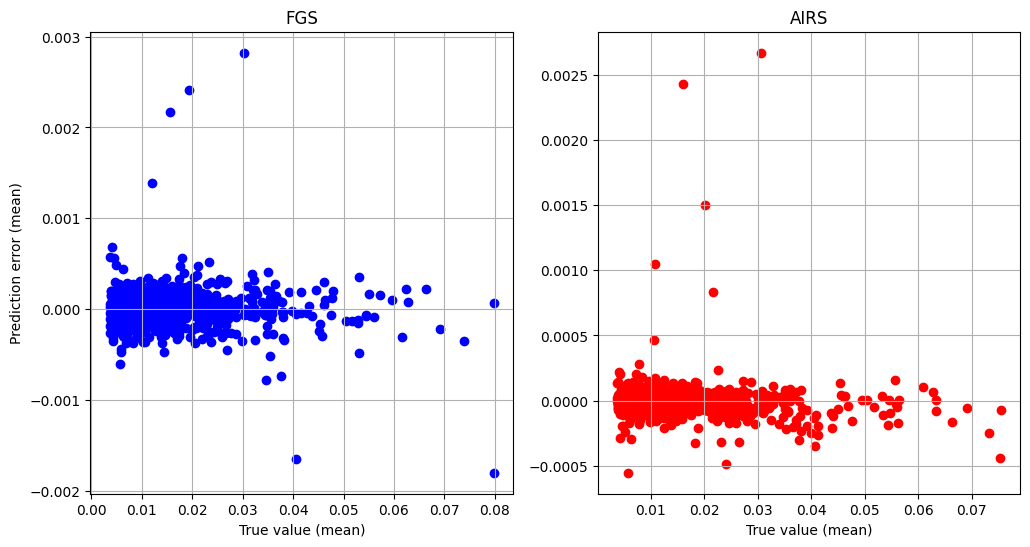

FGS
94572221, ratio:7.110, x:7.776e-05, y:-5.529e-04, RMS:5.532e-04
2554492145, ratio:6.807, x:1.542e-04, y:1.050e-03, RMS:1.062e-03
2270815333, ratio:6.271, x:7.731e-05, y:-4.848e-04, RMS:1.064e-03
346757988, ratio:3.711, x:1.255e-04, y:4.656e-04, RMS:4.651e-04
2154305089, ratio:3.507, x:2.366e-04, y:8.298e-04, RMS:8.498e-04
AIRS
2270815333, ratio:12.657, x:3.830e-05, y:-4.848e-04, RMS:1.064e-03
3649218579, ratio:12.525, x:2.131e-04, y:2.669e-03, RMS:2.671e-03
94572221, ratio:12.495, x:4.425e-05, y:-5.529e-04, RMS:5.532e-04
2554492145, ratio:11.545, x:9.092e-05, y:1.050e-03, RMS:1.062e-03
576917580, ratio:8.589, x:1.746e-04, y:1.499e-03, RMS:1.506e-03


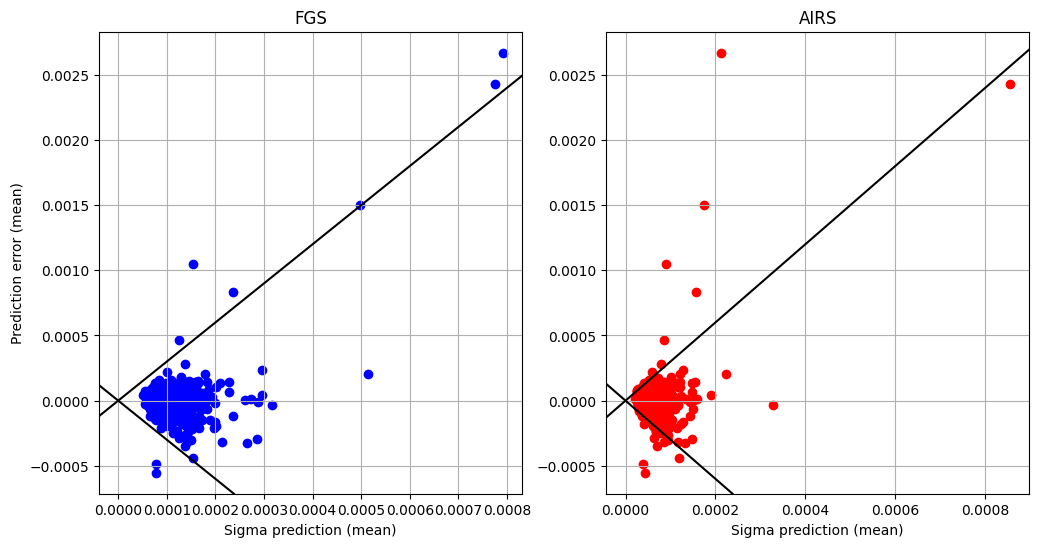

AIRS variation
2270815333, ratio:7.837, x:1.211e-04, y:9.491e-04, RMS:1.064e-03
1349926825, ratio:7.828, x:1.300e-04, y:1.017e-03, RMS:1.051e-03
1345089302, ratio:4.533, x:1.478e-05, y:6.702e-05, RMS:8.652e-05
926530491, ratio:4.398, x:1.593e-05, y:7.008e-05, RMS:9.702e-05
1843015807, ratio:4.041, x:1.602e-05, y:6.475e-05, RMS:2.427e-03


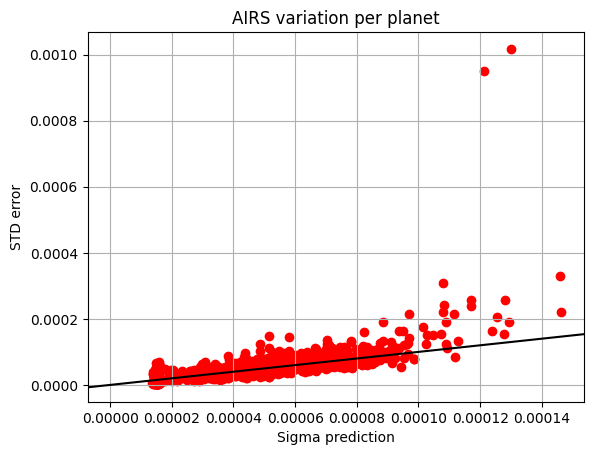

4 iters
[1.0024612043979069, 1.004271533840395]
[-8.768864670234591e-07, 1.5186328254460665e-05]
[1.6489488312197098, 1.4103877537410237]
Score:          0.5980
RMS error FGS:  219.70 ppm
RMS error AIRS: 160.29 ppm

20
Score:          0.6107
RMS error FGS:  126.50 ppm
RMS error AIRS: 79.29 ppm

No fudge
Score:          0.5746
RMS error FGS:  219.70 ppm
RMS error AIRS: 160.29 ppm


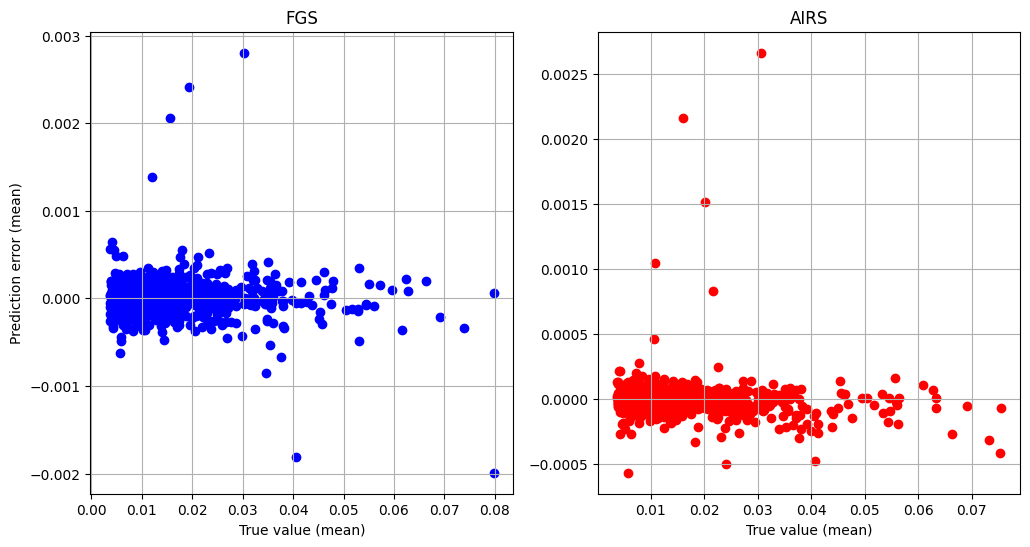

FGS
94572221, ratio:7.277, x:7.751e-05, y:-5.641e-04, RMS:5.644e-04
2554492145, ratio:6.777, x:1.542e-04, y:1.045e-03, RMS:1.058e-03
2270815333, ratio:6.431, x:7.754e-05, y:-4.987e-04, RMS:1.050e-03
3649218579, ratio:3.731, x:7.135e-04, y:2.662e-03, RMS:2.664e-03
346757988, ratio:3.720, x:1.254e-04, y:4.663e-04, RMS:4.659e-04
AIRS
94572221, ratio:12.814, x:4.402e-05, y:-5.641e-04, RMS:5.644e-04
2270815333, ratio:12.747, x:3.912e-05, y:-4.987e-04, RMS:1.050e-03
3649218579, ratio:11.007, x:2.419e-04, y:2.662e-03, RMS:2.664e-03
2554492145, ratio:10.515, x:9.937e-05, y:1.045e-03, RMS:1.058e-03
576917580, ratio:7.728, x:1.963e-04, y:1.517e-03, RMS:1.523e-03


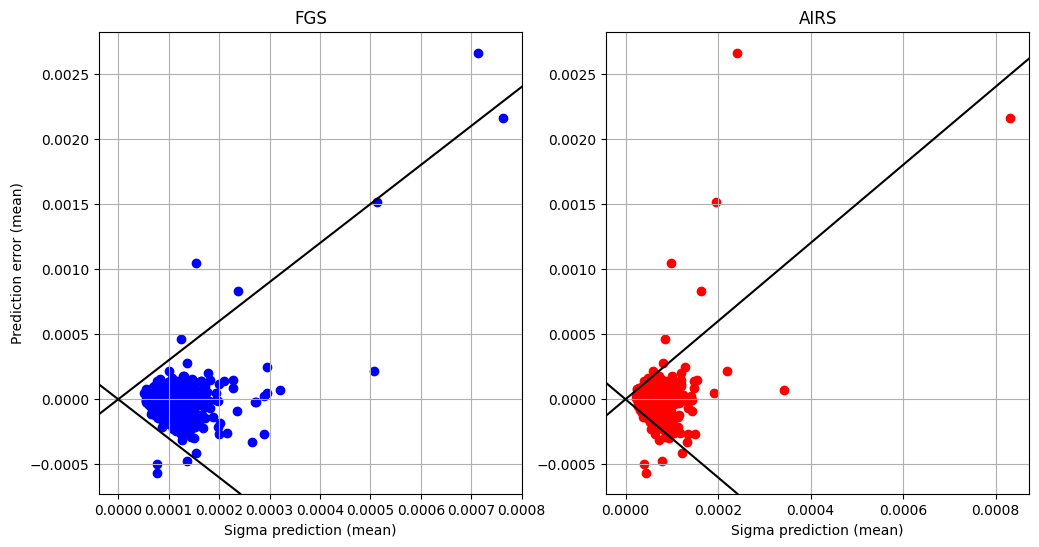

AIRS variation
1349926825, ratio:10.718, x:9.469e-05, y:1.015e-03, RMS:1.066e-03
2270815333, ratio:10.658, x:8.694e-05, y:9.266e-04, RMS:1.050e-03
3786449677, ratio:4.633, x:1.083e-04, y:5.015e-04, RMS:6.988e-04
1345089302, ratio:4.533, x:1.478e-05, y:6.701e-05, RMS:8.602e-05
926530491, ratio:4.399, x:1.593e-05, y:7.009e-05, RMS:1.126e-04


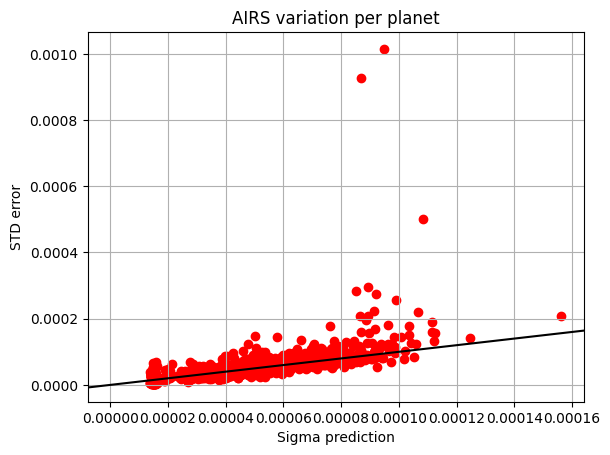

In [14]:
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:5]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
for k,v in todo.items():
    (inferred_data,model) = kgs.dill_load(fname(k))
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    print(k)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_fudge)
    kgs.score_metric(inferred_data, train_data)
    print('')
    print('20')
    kgs.score_metric(inferred_data[:20], train_data[:20]) 
    print('')
    print('No fudge')
    model.sigma_fudge = [1,1]
    # model.bias_a = [1,1]
    # model.bias_b = [0,0]
    # print('!!!')
    inferred_data = model.infer(train_data)
    kgs.score_metric(inferred_data, train_data)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,1:],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)

In [8]:
compare1= 'Baseline GP'
compare2= '4 iters'
data1 = kgs.dill_load(fname(compare1))[0]
data2 = kgs.dill_load(fname(compare2))[0]

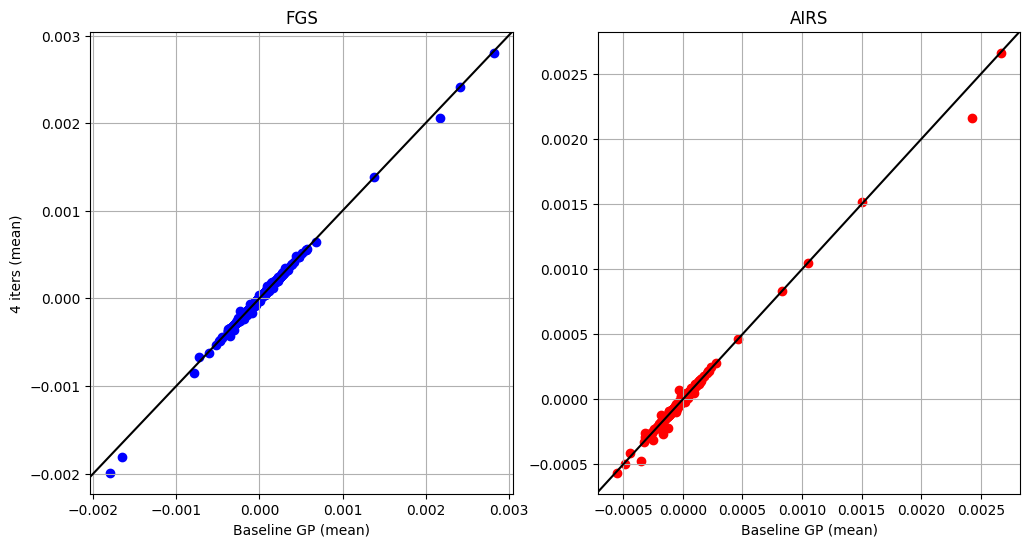

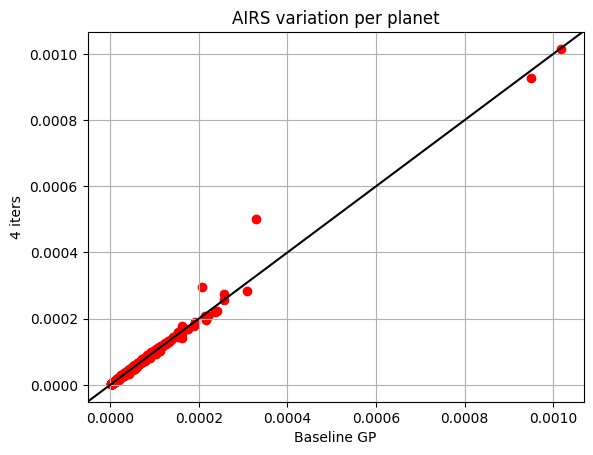

In [13]:
error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data)])
error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data)])
def plot_prediction_vs_true(slic, col, name):
    x = np.mean(error1[:,slic],1)
    y = np.mean(error2[:,slic],1)
    plt.scatter(x,y,color = col)

plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

plt.figure(); basics()
plt.title('AIRS variation per planet')
plt.xlabel(compare1)
plt.ylabel(compare2)
x=np.sqrt(np.var(error1[:,1:],1))
y=np.sqrt(np.var(error2[:,1:],1))
plt.scatter(x, y, color='red')
plt.axline((0,0), slope=1, color='black')
plt.pause(0.001)